Лабораторная работа №2 “Логистическая регрессия. Многоклассовая классификация”
======
Лабораточная работа выполнена на языке **Python** c помощью интерактивной оболочки **Jupyter Notebook**
Исходный код работы - lab2.py.
Файл jupyter notebook - lab2.ipynb

Набор данных **ex2data1.txt** представляет собой текстовый файл, содержащий информацию об оценке студента по первому экзамену (первое число в строке), оценке по второму экзамену (второе число в строке) и поступлении в университет (0 - не поступил, 1 - поступил).

Набор данных **ex2data2.txt** представляет собой текстовый файл, содержащий информацию о результате первого теста (первое число в строке) и результате второго теста (второе число в строке) изделий и результате прохождения контроля (0 - контроль не пройден, 1 - контроль пройден).

Набор данных **ex2data3.mat** представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 20x20 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 400 элементов. В результате загрузки набора данных должна быть получена матрица 5000x400. Далее расположены метки классов изображений от 1 до 9 (соответствуют цифрам от 1 до 9), а также 10 (соответствует цифре 0).

## Ход выполнения работы

### Загрузите данные ex2data1.txt из текстового файла.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
data_row1 = np.genfromtxt('ex2data1.txt', delimiter=',')
data1 = pd.DataFrame(data_row1, columns=list(['grade1', 'grade2', 'isAdmitted']))
data1.describe()

,grade1,grade2,isAdmitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

<Figure size 432x288 with 0 Axes>

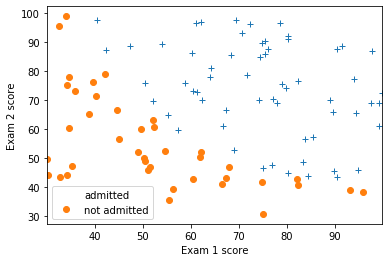

In [29]:
plt.figure()
ax = data1.loc[data1.isAdmitted == 1].plot(x='grade1', y='grade2', style=['+'], label='admitted')
data1.loc[data1.isAdmitted == 0].plot(x='grade1', y='grade2', style=['o'], label='not admitted', ax=ax)
ax.set_ylabel('Exam 2 score')
ax.set_xlabel('Exam 1 score')
plt.show()

In [14]:
plot_data = data1.loc[data1.isPassed == 1]['grade1'].append(data1.loc[data1.isPassed == 1]['grade2'])
plot_data.describe()

count    120.000000
mean      74.337662
std       15.411800
min       40.457551
25%       64.142572
50%       75.369994
75%       87.183031
max       99.827858
dtype: float64

### Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [52]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [59]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X @ theta)
    J = (-1 / m) * ((y.T @ np.log(h)) + ((1-y).T @ np.log(1-h)))
    error = h - y
    grad = (1 / m) * (X.T @ error)
    return J, grad

In [60]:
m, n = data1.shape
X = data1[['grade1', 'grade2']]
X.insert(0, 'theta_0', 1)
X = X.to_numpy()
y = data1['isAdmitted']
initial_theta = np.zeros(n)
cost, grad = costFunction(initial_theta, X, y)
print(f'Cost at initial theta (zeros): {cost}')
print(f'Gradient at initial theta (zeros): {grad} \n')

Cost at initial theta (zeros): 0.6931471805599452
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221] 



### Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

In [146]:
import scipy.optimize as opt

def costOptimize(theta, X, y):
    cost, _ = costFunction(theta, X, y)
    return cost

def gradientOptimize(theta, X, y):
    _, grad = costFunction(theta, X, y)
    return grad

def optimize(func, gradient, X, y, method):
    n = y.shape[1]
    initial_theta = np.zeros(n)
    result = opt.minimize(fun = func, x0 = initial_theta, args = (X, y), method = method, jac = gradient)
    theta = result.x
    cost = func(theta, X, y)
    print(f'Cost at theta found : {cost}')
    print(f'theta: {theta}')
    return result

#### Optimization using gradient information in a truncated Newton algorithm

In [78]:
optimize(costOptimize, gradientOptimize, X, y, 'TNC')

Cost at theta found : 0.2034977015894746
theta: [-25.16131861   0.20623159   0.20147149]


     fun: 0.2034977015894746
     jac: array([8.98032450e-09, 8.46951977e-08, 4.76544166e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131861,   0.20623159,   0.20147149])

#### Unconstrained minimization of a function using the Newton-CG method

In [84]:
result = optimize(costOptimize, gradientOptimize, X, y, 'Newton-CG')
result

Cost at theta found : 0.20349771001679343
theta: [-25.15380655   0.20617146   0.20141074]


     fun: 0.20349771001679343
     jac: array([1.40815808e-05, 7.48488706e-04, 7.23594998e-04])
 message: 'Optimization terminated successfully.'
    nfev: 64
    nhev: 0
     nit: 26
    njev: 217
  status: 0
 success: True
       x: array([-25.15380655,   0.20617146,   0.20141074])

### Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.

In [95]:
def predict(theta, X):
    predict = sigmoid(np.dot(X, theta))
    return predict > 0.5

theta = result.x
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print(f'For a student with scores 45 and 85, we predict an admission probability of {prob}')

For a student with scores 45 and 85, we predict an admission probability of 0.7762286402437759


In [98]:
p = predict(np.array(theta), X)
print('Train Accuracy: %f' % ((y[p == y].size / float(y.size)) * 100.0))

Train Accuracy: 89.000000


### Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

<Figure size 432x288 with 0 Axes>

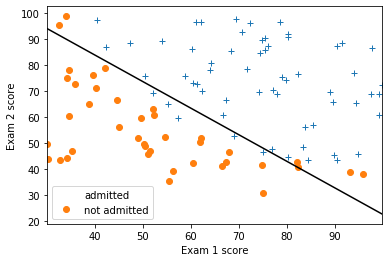

In [99]:
plt.figure()
ax = data1.loc[data1.isAdmitted == 1].plot(x='grade1', y='grade2', style=['+'], label='admitted')
data1.loc[data1.isAdmitted == 0].plot(x='grade1', y='grade2', style=['o'], label='not admitted', ax=ax)
ax.set_ylabel('Exam 2 score')
ax.set_xlabel('Exam 1 score')
slope = -(theta[1] / theta[2])
intercept = -(theta[0] / theta[2])
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");
plt.show()

### Загрузите данные ex2data2.txt из текстового файла.

In [188]:
data_row2 = np.genfromtxt('ex2data2.txt', delimiter=',')
data2 = pd.DataFrame(data_row2, columns=list(['test1', 'test2', 'accepted']))
data2.describe()

,test1,test2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


### Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

<Figure size 432x288 with 0 Axes>

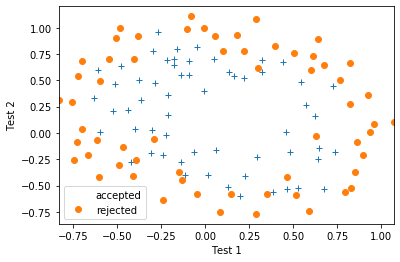

In [189]:
plt.figure()
ax = data2.loc[data2.accepted == 1].plot(x='test1', y='test2', style=['+'], label='accepted')
data2.loc[data2.accepted == 0].plot(x='test1', y='test2', style=['o'], label='rejected', ax=ax)
ax.set_ylabel('Test 2')
ax.set_xlabel('Test 1')
plt.show()

### Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).

In [108]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

mapped = map_feature(data2['test1'].to_numpy(), data2['test2'].to_numpy())

(118, 28)

### Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

In [224]:
def cost_function_reg(theta, X, y, l):
    '''Compute the cost and partial derivatives as grads
    '''

    h = sigmoid(X.dot(theta))

    thetaR = theta[1:, 0]

    J = (-1.0 / m) * ((y.T @ np.log(h)) + ((1 - y.T) @ np.log(1.0 - h))) + (l / (2.0 * m)) * (thetaR.T @ thetaR)

    y.shape = h.shape
    delta = h - y
    sumdelta = delta.T @ X[:, 1]
    grad1 = (1.0 / m) * sumdelta

    XR = X[:, 1:X.shape[1]]
    sumdelta = delta.T @ XR

    grad = (1.0 / m) * (sumdelta + l * thetaR)

    out = np.zeros(shape=(grad.shape[0], grad.shape[1] + 1))

    out[:, 0] = grad1
    out[:, 1:] = grad

    return J.flatten(), out.T.flatten()

def gradient_descent(X, y, theta, l, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    j_history = []
    for i in range(0, num_iters):
        cost, grad = cost_function_reg(theta, X, y, l)
        grad.shape = theta.shape
        theta -= alpha * grad
        j_history.append(cost)

    return theta, j_history

m, n = data2.shape
y = data2['accepted'].to_numpy()
y.shape = (m, 1)
initial_theta = np.zeros(shape=(mapped.shape[1], 1))
#Set regularization parameter lambda to 1
l = 1
gd_theta, costs = gradient_descent(mapped, y, initial_theta, l, 0.2, 400)

### Реализуйте другие методы оптимизации.

In [184]:
def cost_decorator(theta, X, y):
    theta.shape = (mapped.shape[1], 1)
    cost, _ = cost_function_reg(theta, X, y, l)
    theta.shape = (mapped.shape[1],)
    return cost


def gradient_decorator(theta, X, y):
    theta.shape = (mapped.shape[1], 1)
    _, grad = cost_function_reg(theta, X, y, l)
    theta.shape = (mapped.shape[1],)
    return grad

initial_theta = np.zeros((mapped.shape[1], ))
result = opt.minimize(fun=cost_decorator, x0=initial_theta, args=(mapped, y), method='BFGS', jac=gradient_decorator)
bfgs_theta = result.x

### Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.

In [185]:
p = predict(np.array(gd_theta), mapped)
print('Train Accuracy with gradient descent: %f' % ((y[p == y].size / float(y.size)) * 100.0))
p = predict(np.array(bfgs_theta), mapped)
p.shape = y.shape
print('Train Accuracy using the BFGS algorithm: %f' % ((y[p == y].size / float(y.size)) * 100.0))

Train Accuracy with gradient descent: 80.508475
Train Accuracy using the BFGS algorithm: 83.898305


### Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.

<Figure size 432x288 with 0 Axes>

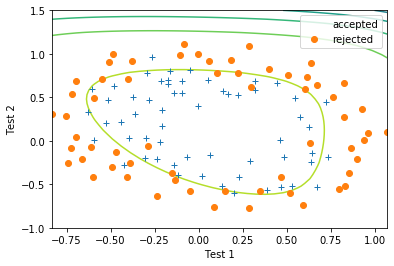

In [195]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(bfgs_theta)))

z = z.T
plt.figure()
ax = data2.loc[data2.accepted == 1].plot(x='test1', y='test2', style=['+'], label='accepted')
data2.loc[data2.accepted == 0].plot(x='test1', y='test2', style=['o'], label='rejected', ax=ax)
ax.contour(u, v, z)
ax.set_ylabel('Test 2')
ax.set_xlabel('Test 1')
plt.show()

### Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.

<Figure size 432x288 with 0 Axes>

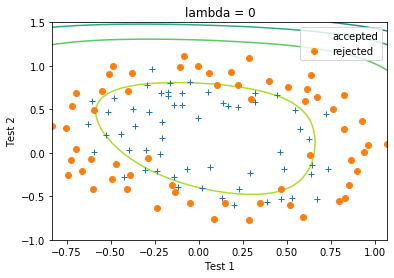

In [217]:
def train_with_plot(l):
    
    def plot(theta):
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros(shape=(len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(theta)))

        z = z.T
        plt.figure()
        ax = data2.loc[data2.accepted == 1].plot(x='test1', y='test2', style=['+'], label='accepted')
        data2.loc[data2.accepted == 0].plot(x='test1', y='test2', style=['o'], label='rejected', ax=ax)
        ax.contour(u, v, z)
        ax.set_ylabel('Test 2')
        ax.set_xlabel('Test 1')
        plt.title(f'lambda = {l}')
        plt.show()
        
    initial_theta = np.zeros(shape=(mapped.shape[1], 1))
    theta, _ = gradient_descent(mapped, y, initial_theta, l, 0.2, 1000)
    data2 = pd.DataFrame(data_row2, columns=list(['test1', 'test2', 'accepted']))

    plot(theta)
    
train_with_plot(0)
    

<Figure size 432x288 with 0 Axes>

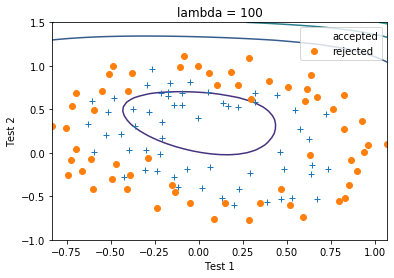

In [200]:
train_with_plot(100)

### Загрузите данные ex2data3.mat из файла.

In [225]:
import scipy.io

data3 = scipy.io.loadmat('ex2data3.mat')
x = np.array(data3['X'])
y = np.squeeze(data3['y'])
np.place(y, y == 10, 0)
n = x.shape[1]
m = x.shape[0]
labels_count = 10

### Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.

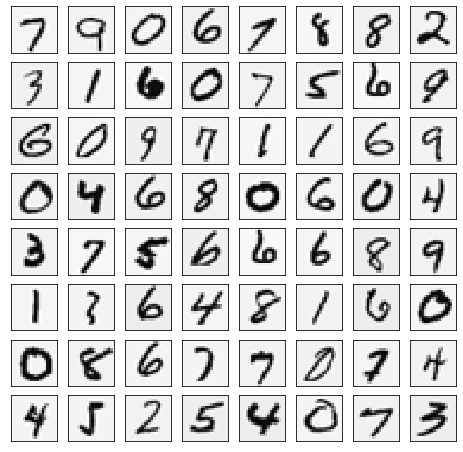

In [232]:
import matplotlib.image as mpimg

subplots = 64
draw_seed = np.random.randint(low=0, high=x.shape[0], size=subplots)
draw_rows = x[draw_seed]
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    data = np.reshape(draw_rows[i], (20, 20), order='F')
    axi.imshow(data, cmap='binary')
    axi.set(xticks=[], yticks=[])

plt.show()

### Реализуйте бинарный классификатор с помощью логистической регрессии с использованием векторизации (функции потерь и градиентного спуска).
### Добавьте L2-регуляризацию к модели.
### Реализуйте многоклассовую классификацию по методу “один против всех”.

In [230]:
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x
classifiers = np.zeros(shape=(labels_count, n + 1))
for i in range(0, labels_count):
    label = (y == i).astype(int)
    initial_theta = np.zeros(shape=(X.shape[1], 1))
    theta, costs = gradient_descent(X, label, initial_theta, 0.4, 2.8, 10000)
    classifiers[i, :] = np.squeeze(theta)

### Реализуйте функцию предсказания класса по изображению с использованием обученных классификаторов.

In [227]:
def predict_class(input, classifiers):
    class_probs = sigmoid(input @ classifiers.transpose())
    if len(class_probs.shape) == 1:
        class_probs.shape = (1, class_probs.shape[0])
    predictions = class_probs.argmax(axis=1)
    return predictions

### Процент правильных классификаций на обучающей выборке должен составлять около 95%.

In [229]:
predictions = predict_class(X, classifiers)
print(f'Training accuracy: {str(100 * np.mean(predictions == y))}')

Training accuracy: 94.74000000000001


## Вывод
В данной лабораторной работе была показана работа модели логистической регрессии, реализована L2-регуляризацию для логистической регрессии, реализован бинарный классификатор с помощью логистической регрессии, который использовался для реализации многоклассового классификатора по методу "один против всех".
